# Calculating z scores for VM subjects

In [250]:
import os
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# Set current working directory
os.chdir('C:/Users/amu_k/subjects-mri-dwi/pre-processing-files/extracted-lab-regions')

# Excel file
excel = pd.ExcelFile('average_values.xlsx')

# Which tensor map-brain region?
df = excel.parse('tf-WholeBrain') #PZ, GE, WM
# Run all of them - pick PZ and GE

# Identify VM subjects
VM_rows = [3, 9, 54, 55, 140, 170]

# 3 - 31.86 weeks
# 9 - 32 weeks
# 54 - 25.71 weeks
# 55 - 33.29 weeks
# 140 - 29.71 weeks
# 170 - 29.57 weeks

#VM_subjects = df[df.index.isin(VM_rows)]
#normal_subjects = df[~df.index.isin(VM_rows)]

# Split normal subjects by GA: 26, 30, 32, and 33
# 26 GA - 25.50 - 26.49
# 30 GA - 29.50 - 30.49
# 32 GA - 31.50 - 32.49
# 33 GA - 32.50 - 33.49

# Define GA ranges for grouping
GA_range = [
    (26, 25.5, 26.49),
    (30, 29.5, 30.49),
    (32, 31.5, 32.49),
    (33, 32.5, 33.49)
]

# Function to group subjects by GA
def group_subjects(GA):
    for label, lower, upper in GA_range:
        if lower <= GA <= upper:
            return f'{label} weeks'
    return 'Other'
    
# Apply function to GA column in dataframe
df['ga group'] = df['ga'].apply(group_subjects)

# Dictionary to store grouped data
grouped_data = {}
for group_name, group_data in df.groupby('ga group'):
    
    # Calculate z scores for all subjects within each GA group
    group_data['z_scores'] = zscore(group_data['average'])
    
    # Filter VM subjects and store their info with z scores
    VM_subjects_info = group_data[group_data.index.isin(VM_rows)][
        ['subject_name', 'ga', 'average', 'z_scores']
    ]
    
    # Filter healthy subjects and calculate their z scores
    non_VM_group_data = group_data[~group_data.index.isin(VM_rows)]
    non_VM_zscores = zscore(non_VM_group_data['average'])
    
    # Update grouped data to include z scores for both VM and healthy subjects
    non_VM_subjects_info = non_VM_group_data[['subject_name', 'ga', 'average', 'z_scores']]
    
    grouped_data[group_name] = {
        'VM_subjects': VM_subjects_info,
        'non_VM_subjects': non_VM_subjects_info
    }

# Print the keys (group names) of the grouped data
print("Group Names:", grouped_data.keys())

# Print z-scores for each group
for group_name, group_data in grouped_data.items():
    print(f"Group: {group_name}")
    
    # Print z-scores for VM subjects
    print("VM Subjects:")
    print(group_data['VM_subjects'][['subject_name', 'z_scores']])
    
    # Print z-scores for non-VM subjects
    print("Non-VM Subjects:")
    print(group_data['non_VM_subjects'][['subject_name', 'z_scores']])
    
    print()
    
#print(non_VM_group_data)

Group Names: dict_keys(['26 weeks', '30 weeks', '32 weeks', '33 weeks', 'Other'])
Group: 26 weeks
VM Subjects:
                 subject_name  z_scores
54  sub-CC00960XX12_ses-23130  0.988112
Non-VM Subjects:
                   subject_name  z_scores
11      sub-CC00877XX20_ses-820 -0.237599
19     sub-CC00898XX25_ses-6231 -0.930572
33    sub-CC00922XX15_ses-11630  0.596018
62    sub-CC00973XX17_ses-29930 -1.221200
75    sub-CC01001XX03_ses-39230 -0.621875
77    sub-CC01008XX10_ses-47430  1.831577
90    sub-CC01029XX15_ses-59630 -0.203765
113   sub-CC01089XX18_ses-72630  0.429364
124   sub-CC01114XX09_ses-82430 -0.017329
125   sub-CC01115XX10_ses-87031 -2.241096
126   sub-CC01118XX13_ses-87631 -0.973296
127   sub-CC01119XX14_ses-92230  1.488825
139   sub-CC01138XX17_ses-95030 -0.348212
145  sub-CC01147XX18_ses-101330  0.258887
153  sub-CC01162XX08_ses-113830  0.909126
185  sub-CC01250XX05_ses-166930  0.293036

Group: 30 weeks
VM Subjects:
                   subject_name  z_scores
140   

In [251]:
# Find VM subject names
VM_subject_names = df.loc[VM_rows, 'subject_name']

# Print z-scores of VM subjects across all groups
print("VM Subjects Z-Scores Across All Groups:")
for group_name, group_data in grouped_data.items():
    VM_subjects_in_group = group_data['VM_subjects']
    if not VM_subjects_in_group.empty:
        print(f"Group: {group_name}")
        print(VM_subjects_in_group[['subject_name', 'z_scores']])
    else:
        print(f"No VM subjects in group: {group_name}")

VM Subjects Z-Scores Across All Groups:
Group: 26 weeks
                 subject_name  z_scores
54  sub-CC00960XX12_ses-23130  0.988112
Group: 30 weeks
                   subject_name  z_scores
140   sub-CC01141XX12_ses-99932  0.192142
170  sub-CC01202XX06_ses-142630 -0.574082
Group: 32 weeks
               subject_name  z_scores
3   sub-CC00865XX16_ses-621  0.607886
9  sub-CC00875XX18_ses-2521  0.583084
Group: 33 weeks
                 subject_name  z_scores
55  sub-CC00961XX13_ses-23830  0.482985
No VM subjects in group: Other


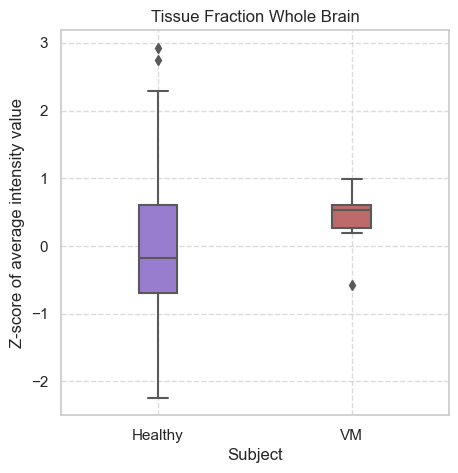

In [252]:
# Plot boxplot comparing z-scores of VM and non-VM subjects across all GA groups
all_VM_zscores = []
all_non_VM_zscores = []

for group_name, group_data in grouped_data.items():
    VM_zscores = group_data['VM_subjects']['z_scores']
    non_VM_zscores = group_data['non_VM_subjects']['z_scores']
    
    all_VM_zscores.extend(VM_zscores)
    all_non_VM_zscores.extend(non_VM_zscores)
    
# Set style
sns.set(style="whitegrid")

# Define colors for box plot
colors = ['mediumpurple', 'indianred']

# Plot boxplot comparing z-scores of VM and non-VM subjects across all GA groups
plt.figure(figsize=(5, 5))
sns.boxplot(data=[all_non_VM_zscores, all_VM_zscores], palette=colors, width=0.2)

# Add title and labels
plt.title('Tissue Fraction Whole Brain')
plt.xlabel('Subject')
plt.ylabel('Z-score of average intensity value')

# Customize tick labels
plt.xticks(ticks=[0, 1], labels=['Healthy', 'VM'])
#plt.yticks(fontsize=6)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
#plt.tight_layout()
plt.show()

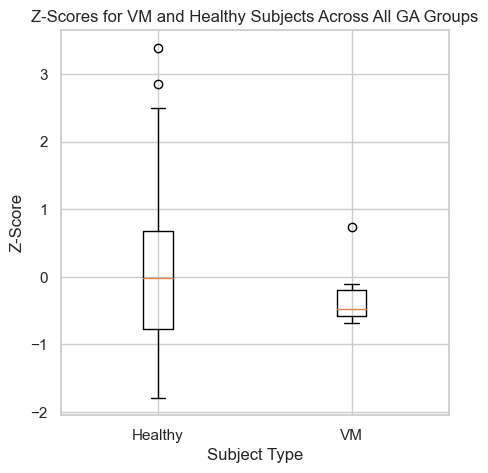

In [20]:
# Plot boxplot comparing z-scores of VM and non-VM subjects across all GA groups
all_VM_zscores = []
all_non_VM_zscores = []

for group_name, group_data in grouped_data.items():
    VM_zscores = group_data['VM_subjects']['z_scores']
    non_VM_zscores = group_data['non_VM_subjects']['z_scores_non_VM']
    
    all_VM_zscores.extend(VM_zscores)
    all_non_VM_zscores.extend(non_VM_zscores)

# Plot boxplot comparing z-scores of VM and non-VM subjects across all GA groups
plt.figure(figsize=(5, 5))
plt.boxplot([all_non_VM_zscores, all_VM_zscores], labels=['Healthy', 'VM'])
plt.title('Z-Scores for VM and Healthy Subjects Across All GA Groups')
plt.xlabel('Subject Type')
plt.ylabel('Z-Score')
plt.grid(True)
plt.show()